This notebook refers to the manuscript "Information geometry for Fermi-Dirac and Bose-Einstein quantum statistics" available as a preprint in https://arxiv.org/abs/2103.00935 and published as <i>Physica A</i> <b>576</b> 126061, 2011 https://doi.org/10.1016/j.physa.2021.126061

In [1]:
from IGQG import *
from numpy import array,arange,concatenate,zeros,exp,meshgrid,log

from matplotlib import pyplot as plt

This notebook calculates (i) the dimensionless quantity $\bar{g}_f$  related to the metric determinant for fermions acording to equations (31) in the manuscript, (ii) the dimensionless quantity $\bar{R}_f$ related to the curvature for acording to equation (34) in the manuscript, and (iii) the countour graphs for curvature of both fermions presented in Fig. 3.

The commented cell [6] obtain the curvature graph for $\eta=2$

In [2]:
step = 1/log(10)
x = concatenate([arange(.01,1,.01),10**(arange(0,5+step,step))])

Metric Determinant

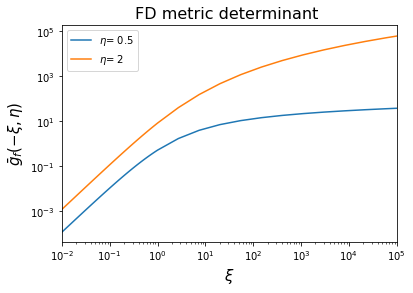

In [3]:
etaarray = [.5,2]
fig, ax = plt.subplots()

for etaa in etaarray:
    y = fermi_Determinant(array([A(etaa,-xx) for xx in x]))
    line1, = ax.plot(x, y, label=('$\eta $= {}'.format(etaa)))

ax.set_xlim(.01,1e5)
#ax.set_ylim(-0.1,float(y.max()))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\xi$', fontsize=15)
ax.set_ylabel(r'$\bar{g}_f(-\xi,\eta)$', fontsize=15)
ax.set_title(r'FD metric determinant ', fontsize=16)

plt.legend()
plt.savefig('logAfermions.png',dpi=600)
plt.show()

Curvature unitless

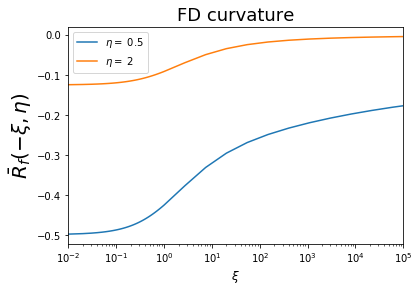

In [4]:
etaarray = [.5,2]
fig, ax = plt.subplots()

for etaa in etaarray:
    a = array([A(etaa,-xx) for xx in x])
    b = array([B(etaa,-xx) for xx in x])
    y = fermi_Curvature(a,b)
    line1, = ax.plot(x, y, label=('$\eta =$ {}'.format(etaa)))

ax.set_xlim(.01,1e5)
#ax.set_ylim(float(y.min()),0)
ax.set_xscale('log')

ax.set_xlabel(r'$\xi$', fontsize=12)
ax.set_ylabel(r'$\bar{R}_f (-\xi,\eta)}$', fontsize=20)
ax.set_title(r'FD curvature', fontsize=18)
ax.legend()

plt.savefig('logBoA2fermions.png', bbox_inches = "tight", dpi=600)
plt.show()

Contour $\eta=.5$ and $2$

In [5]:
eta =.5
betaf = arange(0,.1+1e-8,.0025)*6
x = concatenate([arange(.01,1,.01),10**(arange(0,5+1e-8,step/2.5))])

In [6]:
#eta=2

In [7]:
aarray = array([A(eta,-xx) for xx in x])
barray = array([B(eta,-xx) for xx in x])

In [8]:
X,Y = meshgrid(x,betaf)
Z = .5*(Y**(eta+1))*fermi_Curvature(aarray,barray) #the function fermi_Curvature only does the unitless part

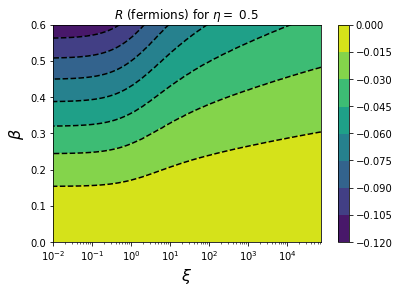

In [9]:
fig, ax = plt.subplots()

#steplvl = .2*Z.min()#.2*log(-float(Z.min()))
#lvls = arange(-5*steplvl+1,0,steplvl)
CF = ax.contourf(X,Y,Z)
CS = ax.contour(X,Y,Z,colors='k')

ax.set_xlabel(r'$\xi$',fontsize=16)
ax.set_ylabel(r'$\beta$',fontsize=16)
ax.set_title(r'$R$ (fermions) for $\eta =$ {} '.format(eta))

#ax.set_xlim(.01,10e5)
ax.set_xscale('log')

plt.colorbar(CF)
plt.savefig('logRfermions-eta{}.png'.format(eta), bbox_inches = "tight",dpi=900)

plt.show()